## 신경망 Neural Network
* hidden layer : 사람 눈에 보이지 않는다.
* h(x) : 0을 넘으면 1 / 못넘으면 0
    * 입력신호의 총합을 출력신호로 변환하는 함수
    * activation function
    * 입력신호의 총합이 활성화를 일으키는지 정하는 함수
* y = h(w1x1 + w2x2 + b)


## Activation Function
* perceptrondml activation function = h(x) = step
* neural network activation fucntion = h(x) = sigmoid
    * sigmoid = 1/(1+np.exp(-x))
* neural network 학습이 가능하려면 activation function은 연속적이여야한다.
* activation function은 반드시 비선형이여야한다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def step_function(x):
    x = x>0
    return x.astype(np.int64) #numpy배열의 자료형을 바꿔주는 함수

In [25]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

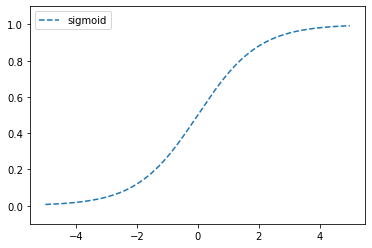

In [8]:
x  = np.arange(-5.0,5.0,0.01)
y = sigmoid(x)

plt.plot(x,y,linestyle='--',label='sigmoid')
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

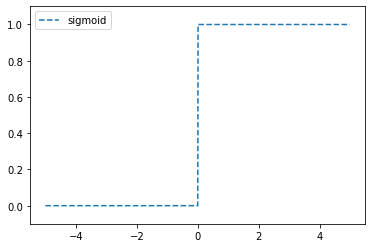

In [9]:
x  = np.arange(-5.0,5.0,0.01)
y = step_function(x)

plt.plot(x,y,linestyle='--',label='sigmoid')
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

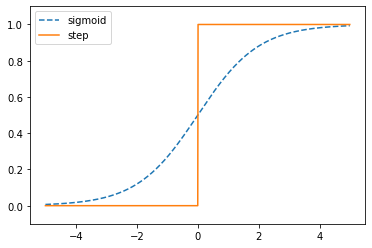

In [10]:
x  = np.arange(-5.0,5.0,0.01)
y = sigmoid(x)
y1 = step_function(x)

plt.plot(x,y,linestyle='--',label='sigmoid')
plt.plot(x,y1,label='step')
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

In [11]:
def ReLU(x):
    return np.maximum(0,x)

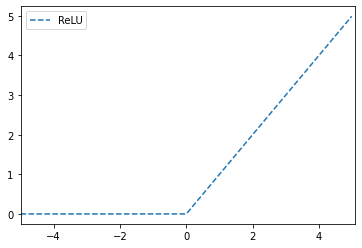

In [13]:
x  = np.arange(-5.0,5.0,0.01)
y = ReLU(x)

plt.plot(x,y,linestyle='--',label='ReLU')
plt.xlim(-5,5.1)
plt.legend()
plt.show()

## 다차원 배열의 계산

### 1차원

In [14]:
x = np.array([1,2,3,4])
print(np.ndim(x)) #numpy array의 차원을 알려준다.
print(x.shape)

1
(4,)


### 2차원

In [15]:
x = np.array([[1,2],[3,4],[5,6]])
print(np.ndim(x))
print(x.shape)

2
(3, 2)


## 행렬곱

In [18]:
x = np.array([1,2]) # x1,x2
W = np.array([[1,3,5],[2,4,6]]) # 1행 : x1과 곱해지는 weight, 2행 : x2와 곱해지는 weight

print(np.dot(x,W))

[ 5 11 17]


In [17]:
x = np.array([[1,2],[3,4]])
W = np.array([[5,6],[7,8]])

print(np.dot(x,W))

[[19 22]
 [43 50]]


## 3층 신경망 구현하기
* input : 2
* hidden layer : 2
    * hidden unit : 3, 2
* output layer : 2

### input layer -> 1층으로 가는 

In [ ]:
X = np.array([x1,x2])
W = np.array([[w11, w21,w31],
             [w12,w22,w32]])
B1 = np.array([b1,b2,b3])

A = np.dot(X,W) + B1

Z1 = sigmoid(A)

### 1층 -> 2층

In [ ]:
Z1 = np.array([z1,z2,z3])
W2 = np.array([[w11,w21],
              [w12,w22],
              [w13,w23]])
B2 = np.array([b1,b2])

A = np.dot(Z1,W2) + B2

Z2 = sigmoid(A)

### 2층 -> output layer

In [ ]:
Z2 = np.array([z1,z2])

W3 = np.array([[w11,w12],
              [w12,w22]])

B3 = np.array([b1,b2])

A = np.dot(Z2,W3) + B3
y = identity_function(A)

## output layer의 activation function은 문제의 성질에 따라 맞게 정한다.
* 회귀 : identity_function
* binary classification : sigmoid
* multiclass classification : softmax

In [19]:
def identity_function(x):
    return x

## 구현 정리

In [22]:
def init_network():
    network={}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['B1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['B2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['B3'] = np.array([0.1,0.2])
    
    return network

def forward(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['B1'],network['B2'],network['B3']
    
    a1 = np.dot(x,W1) + b1
    Z1 = sigmoid(a1)
    
    a2 = np.dot(Z1,W2) + b2
    Z2 = sigmoid(a2)
    
    a3 = np.dot(Z2,W3) + b3
    y = identity_function(a3)
    
    return y

In [23]:
network=init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


In [3]:
import numpy as np

a =np.array([[1,2,3],
            [2,3,4]])

b = np.array([[1,2],
    [2,3],
    [3,4]])
print(a.shape)
print(b.shape)



(2, 3)
(3, 2)


In [4]:
np.dot(a,b)

array([[14, 20],
       [20, 29]])

## 출력층 설계하기
* 신경망은 분류와 회귀에 모두 이용가능
    *  출력층의 활성화함수만 바꿔주면

## 항등함수와 softmax함수 구현
* 항등함수
    * 입력을 그대로 출력
* softmax
    * y_k = $\frac {e^{a_k}}  {\Sigma e^{a_i}}$
    * $\frac {입력신호 a_k의 지수함수} {모든 입력신호의 지수함수의합}$
    * n  : 출력층의 뉴런 수
    * y_k : k번째  뉴런

In [5]:
def softmax(x):
    c = np.max(x)
    exp_a = np.exp(x - c)
    sum_exp_a = np.exp(exp_a)
    y = exp_a / sum_exp_a
    return y
    

## softmax함수의 주의
### overflow 
* 지수함수를 사용하기 때문에 -> 매우 큰값 -> 넘칠수도있다.
* 입력신호중 가장 큰 최댓값을 사용해서 빼준다.

## softmax 함수의 특징
* 0~1
* 총합 = 1

* 확률로 해석이 가능하다.
* [0.018, 0.245,0.737]

0번째 class|1번째 class|2번째 class
----------|----------|---------|
1%|24%|73%

## 뉴런 수 정하기
* output층은 문제에 맞게 설정
    * 분류 : 분류하고 싶은 클래스 수

## MNIST 데이터
* 0~9까지 숫자 이미지
* train : 60000
* test : 10000
* 28 x 28 gray scale (1채널) 0~255
* 레이블이 이미 되어있다.


In [9]:
import sys,os
sys.path.append(os.pardir) #부모 디렉토리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(X_train,t_train),(X_test,t_test) = load_mnist(flatten=True, normalize =  False)
#normalize 하지 않으면 0~255사이의 값을 가지고
#normalize 하면 1~0사이의 값을 가진다.
#flatten은 28x28 -> 784의 1차원 배열로 반환해준다.

print(X_train.shape)
print(X_test.shape)
print(t_train.shape)
print(t_test.shape)


(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [12]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))  #넘파이로 저장된 이미지데이터 -> PIL데이터 객체로 변환
    pil_img.show()
    
(X_train,t_train),(X_test,t_test) = load_mnist(flatten=True,normalize=False)

img = X_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28) #이미지를 표시할때는 원래의 형태인 28x28로 다시 변형해주어야한다.
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


## 신경망의 추론처리 (forward propagation)

In [21]:
import pickle

In [27]:
def get_data():
    (X_train,t_train),(X_test,t_test) = load_mnist(flatten=True,normalize=True,one_hot_label=False)
    
    return X_test,t_test

def init_network(): #이미 weight가 학습되어있는 모델을 읽어온다.
    with open("sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    
    return network
    

In [30]:
def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) + b1
    Z1 = sigmoid(a1)
    
    a2 = np.dot(Z1,W2) + b2
    Z2 = sigmoid(a2)
    
    a3 = np.dot(Z2,W3) + b3
    y = sigmoid(a3)
    return y

In [31]:
x,t = get_data()

network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y  = predict(network,x[i])
    p = np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻는다.
    if p==t[i]:
        accuracy_cnt+=1
        
print("Accuracy: "+str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [34]:
x,_  = get_data()

network = init_network()
W1,W2,W3 = network['W1'],network['W2'],network['W3']

print(x.shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784, 50)
(50, 100)
(100, 10)


## Batch 처리
* 더 빠르게 forward propagation을 진행할 수 있다.

In [36]:
x,t = get_data()
network = init_network()
batch_size=100
accuracy_cnt =0 

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])
    
print("Accuracy: "+str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352
